<a href="https://colab.research.google.com/github/PrasannaMadiwar/DataWars-Cleaned-Analysis/blob/main/coder_recolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/coders.csv.csv')
df['willing_relocate'] = df['willing_relocate'].map({'Yes':1,'No':-1,'Maybe':0})

<class 'pandas.core.frame.DataFrame'>
Index: 8074 entries, 0 to 8238
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   weekly_hours         8074 non-null   int64
 1   coding_months        8074 non-null   int64
 2   money_spent          8074 non-null   int64
 3   employed_dev         8074 non-null   int64
 4   expected_salary      8074 non-null   int64
 5   willing_relocate     8074 non-null   int64
 6   last_year_income     8074 non-null   int64
 7   age                  8074 non-null   int64
 8   marital_status       8074 non-null   int64
 9   disability_benefits  8074 non-null   int64
 10  home_internet        8074 non-null   int64
dtypes: int64(11)
memory usage: 756.9 KB


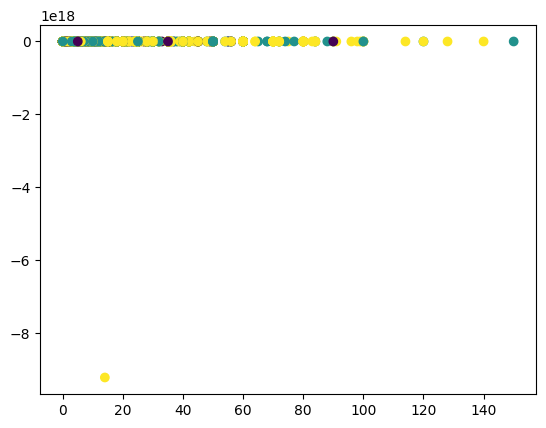

In [ ]:
df.info()

In [ ]:
df['willing_relocate'].fillna(value=df['willing_relocate'].mode(),inplace=True)
df['last_year_income'].fillna(value=df['last_year_income'].mean(),inplace=True)

/tmp/ipython-input-18-2423589913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['willing_relocate'].fillna(value=df['willing_relocate'].mode(),inplace=True)
/tmp/ipython-input-18-2423589913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(8074, 15)

In [ ]:
df['marital_status'].value_counts()

,count
marital_status,
"Single, never married",4936
Married or domestic partnership,2794
Divorced,255
Separated,64
Widowed,25


In [ ]:
df['marital_status'] = df['marital_status'].map({'Single, never married':0,'Married or domestic partnership':1,'Divorced':1,'Separated':1,'Widowed':1})

In [ ]:
df['willing_relocate'] = df['willing_relocate'].astype(int)
df['coding_months'] = df['coding_months'].astype(int)
df['last_year_income'] = df['last_year_income'].astype(int)
df['age'] = df['age'].astype(int)
df['money_spent'] = df['money_spent'].astype(int)


In [ ]:
df.drop(['career_interests','region','education_level','field_of_study'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8074 entries, 0 to 8238
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   weekly_hours         8074 non-null   int64
 1   coding_months        8074 non-null   int64
 2   money_spent          8074 non-null   int64
 3   employed_dev         8074 non-null   int64
 4   expected_salary      8074 non-null   int64
 5   willing_relocate     8074 non-null   int64
 6   last_year_income     8074 non-null   int64
 7   age                  8074 non-null   int64
 8   marital_status       8074 non-null   int64
 9   disability_benefits  8074 non-null   int64
 10  home_internet        8074 non-null   int64
dtypes: int64(11)
memory usage: 756.9 KB


In [ ]:
x = df.drop(['willing_relocate','disability_benefits'],axis=1)
y = df['willing_relocate']

In [ ]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=2)
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)

In [ ]:
for i,col in zip(range(x.shape[1]),x.columns):
  print(f"{col}Selected={rfe.support_[i]}rank={rfe.ranking_[i]}")

weekly_hoursSelected=Truerank=1
coding_monthsSelected=Truerank=1
money_spentSelected=Falserank=5
employed_devSelected=Falserank=8
expected_salarySelected=Falserank=4
last_year_incomeSelected=Falserank=3
ageSelected=Falserank=2
marital_statusSelected=Falserank=7
home_internetSelected=Falserank=6


In [ ]:
X = df[['weekly_hours','coding_months']]
Y = df['willing_relocate']
X['coding_months'] = X['coding_months'].clip(upper=10)
X['weekly_hours'] = X['weekly_hours'].clip(upper=35)


/tmp/ipython-input-151-3343287149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['coding_months'] = X['coding_months'].clip(upper=10)
/tmp/ipython-input-151-3343287149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['weekly_hours'] = X['weekly_hours'].clip(upper=35)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()


In [ ]:
X_train_scl = scl.fit_transform(X_train)
X_test_scl = scl.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_scl,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test_scl)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)


In [ ]:
acc

0.49411764705882355

<Axes: >

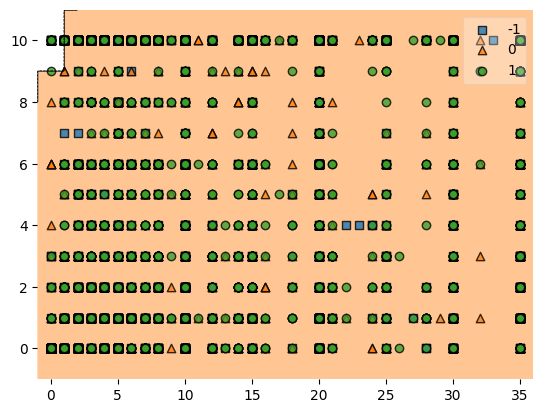

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.values,y_train.values,clf=clf,legend=True)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('relocate.pkl','wb'))

# New Section